In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from env import host, user, password
import seaborn as sns

def get_db_url(username, hostname, password, database):
    url = f'mysql+pymysql://{username}:{password}@{hostname}/{database}'
    return url


In [2]:
def remove_commas_and_dollarsign(string_num):  
    """ 
    Cleans off a starting $ and commas where-ever they are. Takes a string, returns a string 
    """ 
    
    x = string_num.replace(',','')  
    x = x.strip("$")  
    return float(x)  

In [3]:
iris = sns.load_dataset('iris')

In [5]:
iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [ ]:
sns.boxplot(data=iris, y = 'petal_length')

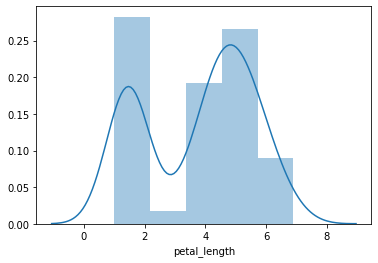

In [4]:
sns.distplot(iris.petal_length)

In [ ]:
sns.relplot(x='petal_length', y='petal_width', data=iris)


In [ ]:
sns.relplot(x='sepal_length', y='sepal_width', col='species' ,
            hue='species', data=iris)


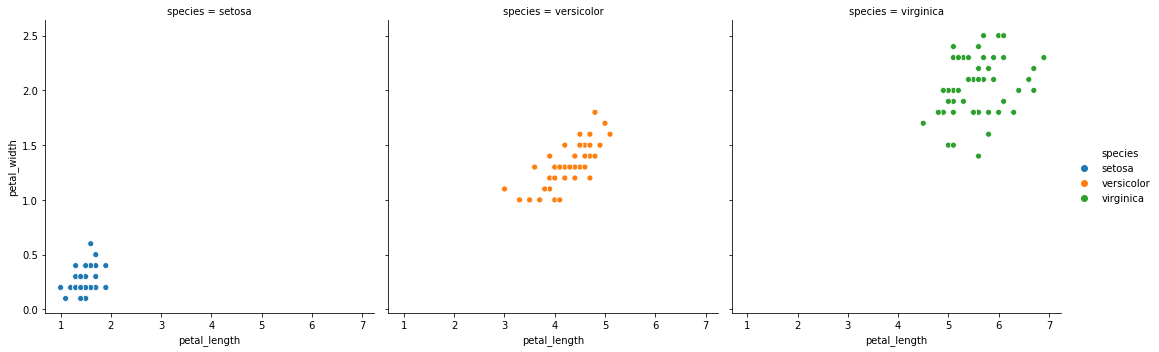

In [7]:
sns.relplot(x='petal_length', y='petal_width', col='species' ,
            hue='species', data=iris)

In [6]:
anscombe = sns.load_dataset('anscombe')


In [7]:
anscombe.corr()

,x,y
x,1.000000,0.816366
y,0.816366,1.000000


In [8]:
anscombe.std()

x    3.198837
y    1.958925
dtype: float64

In [ ]:
anscombe.dtypes

In [ ]:
type(anscombe)

In [ ]:
anscombe.groupby('dataset').x.agg(['min','mean','max'])

In [ ]:
anscombe.groupby('dataset').y.agg(['min','mean','max'])

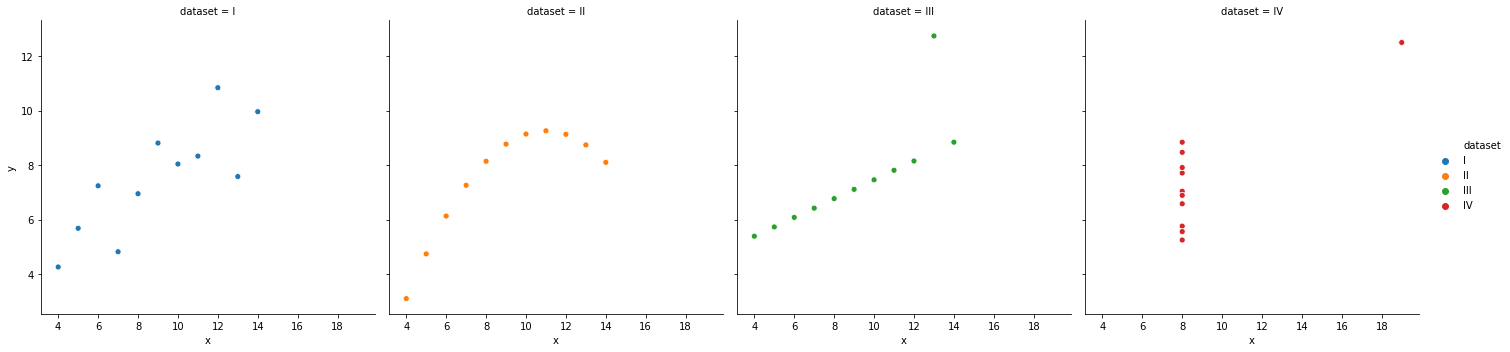

In [13]:
sns.relplot(x='x', y='y', col='dataset' ,
            hue='dataset', data=anscombe)

In [15]:
sprays = pd.read_csv('InsectSprays.csv')

In [16]:
sprays.dtypes

Unnamed: 0     int64
count          int64
spray         object
dtype: object

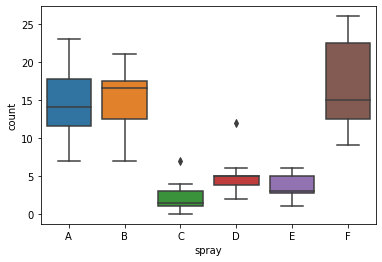

In [17]:
sns.boxplot(data=sprays, y = 'count', x='spray')

In [21]:
swiss = pd.read_csv('swiss.csv')

In [22]:
swiss.dtypes


Unnamed: 0           object
Fertility           float64
Agriculture         float64
Examination           int64
Education             int64
Catholic            float64
Infant.Mortality    float64
dtype: object

In [23]:
swiss.head()


,Unnamed: 0,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6


In [24]:
swiss['is_Catholic'] = swiss.Catholic > 50

In [25]:
swiss.tail()

,Unnamed: 0,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_Catholic
42,Val de Ruz,77.6,37.6,15,7,4.97,20.0,False
43,ValdeTravers,67.6,18.7,25,7,8.65,19.5,False
44,V. De Geneve,35.0,1.2,37,53,42.34,18.0,False
45,Rive Droite,44.7,46.6,16,29,50.43,18.2,True
46,Rive Gauche,42.8,27.7,22,29,58.33,19.3,True


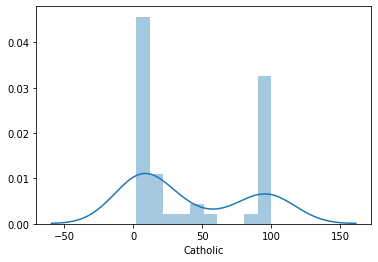

In [26]:
sns.distplot(swiss.Catholic, bins=10)

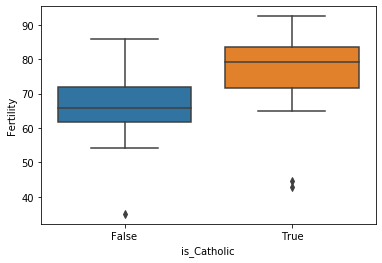

In [23]:
sns.boxplot(x='is_Catholic', y='Fertility', data=swiss)


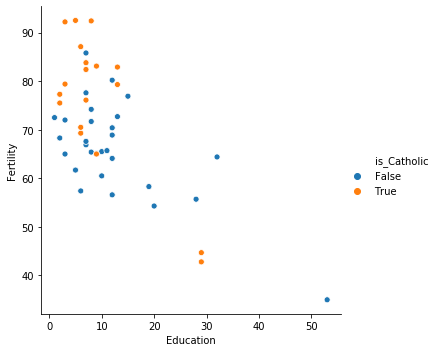

In [27]:
sns.relplot(x='Education', y='Fertility', hue='is_Catholic', data=swiss)


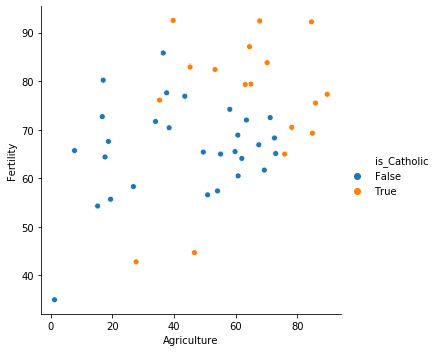

In [28]:
sns.relplot(x='Agriculture', y='Fertility', hue='is_Catholic', data=swiss)


In [29]:
db = 'chipotle'

In [30]:
url = get_db_url(user, host, password, db)

In [39]:
chipotle = pd.read_sql_table('orders', url)

In [40]:
chipotle.item_price.str.replace("$","").astype('float')

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
5       10.98
6        1.69
7       11.75
8        9.25
9        9.25
10       4.45
11       8.75
12       8.75
13      11.25
14       4.45
15       2.39
16       8.49
17       8.49
18       2.18
19       8.75
20       4.45
21       8.99
22       3.39
23      10.98
24       3.39
25       2.39
26       8.49
27       8.99
28       1.09
29       8.49
        ...  
4592    11.75
4593    11.75
4594    11.75
4595     8.75
4596     4.45
4597     1.25
4598     1.50
4599     8.75
4600     4.45
4601     1.25
4602     9.25
4603     9.25
4604     8.75
4605     4.45
4606     1.25
4607    11.75
4608    11.25
4609     1.25
4610    11.75
4611    11.25
4612     9.25
4613     2.15
4614     1.50
4615     8.75
4616     4.45
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [41]:
chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [32]:
chipotle.dtypes

id                     int64
order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [33]:
chipotle['item_price'] = chipotle.item_price.apply(remove_commas_and_dollarsign)

In [34]:
chipotle['total_order'] = chipotle.item_price * chipotle.quantity


In [35]:
item_freq = chipotle.groupby('item_name').total_order.agg(['sum','count'])

In [42]:
top5 = item_freq.sort_values(by='sum',ascending=False).head().reset_index()

In [43]:
top5

,item_name,sum,count
0,Chicken Bowl,8044.63,726
1,Chicken Burrito,6387.06,553
2,Steak Burrito,4236.13,368
3,Steak Bowl,2479.81,211
4,Chips and Guacamole,2475.62,479


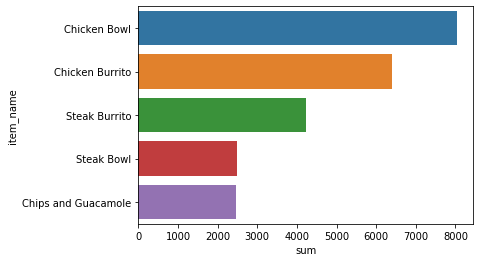

In [48]:
sns.barplot(x="sum", y=top5.item_name, data=top5)

In [82]:
sleep = pd.read_csv('sleep.csv')

In [83]:
sleep.dtypes

Unnamed: 0      int64
extra         float64
group           int64
ID              int64
dtype: object

In [84]:
sleep.head()

,Unnamed: 0,extra,group,ID
0,1,0.7,1,1
1,2,-1.6,1,2
2,3,-0.2,1,3
3,4,-1.2,1,4
4,5,-0.1,1,5


In [87]:
sleep = sleep.set_index('Unnamed: 0')

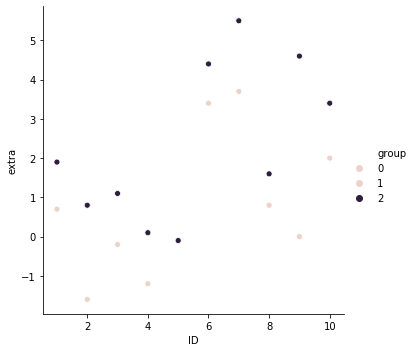

In [90]:
sns.relplot(x='ID', y='extra', hue='group', data=sleep)

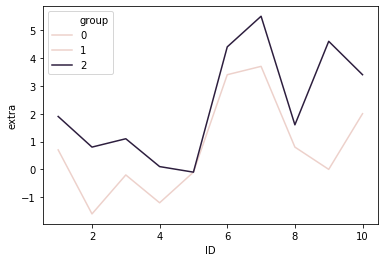

In [99]:
sns.lineplot(x="ID", y="extra", hue="group", data=sleep)